In [16]:
from pylab import *
%matplotlib inline
sys.path.insert(0, "../../lib")# add the library folder to the path I look for modules
sys.path.insert(0, "./linear")# add the library folder to the path I look for modules
from dynamics import *
import itertools
import pickle
import latexify# execute function latexify for plots coherent with latex
from collections import Counter
import pandas as pd
import re
import os
from scipy.stats import poisson
import latexify
import time #to measure performances

def save_obj(obj, name ):
    with open('dic-'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
def load_obj(path,name ):
    with open(path+'/dic-' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

Let me call $$\Pi_d(k)=  e^{-d}\frac{d^k}{k!}$$ the Poisson degree distribution.
Given the out-degree distribution of genes, for $k\geq1$ $P_D^{\mathrm{out}}(k) = \Pi_d(k-1)$

and the out-degree distribution of TFs, for $k\geq0$
$P_C^{\mathrm{out}}(k) = \Pi_c(k)$
The out degree distribution for the projected graph on genes is:
$$
P(k)= \sum_{n=0}^{\infty}\Pi_d(n)\Pi_{n+1}(k)
$$

In [12]:
def plot_corrected_Poissoninan_out(d,c,alpha,data,*args,**kwargs):
    '''Plot the out degree distribution for the projected graph on genes. '''
    d_out=d+where(alpha>1,alpha-1,0)
    c_out=c+1/alpha
    P=[]
    for k in  arange(max(data)):
        s=0
        for n in arange(5*max(data)):
            s+=poisson.pmf(n, d_out)*poisson.pmf(k, (n+1)*c_out)
        P+=[s]
    plot(arange(max(data)),P,'o',alpha=0.5,*args,**kwargs)
    return P


In [13]:
folder_name='knockout-cascade_multiple'


In [4]:
ls knockout-cascade_multiple/

dic-c:1.0 d:1.0.pkl  dic-c:2.0 d:1.0.pkl


In [18]:
folder_name='knockout-cascade_multiple'

dic=load_obj(folder_name,'c:1.0 d:1.0')
d=dic['d']
c=dic['c']
N1=dic['N1']
N2=dic['N2']
gs=dic['g']
Nrep=dic['Nrep']
descritpion=dic['description']


I now aggregate the counts of the cascade over different repetitions.

In [5]:
bs=[]
hs=[]
g_max=max(flatten(gs))
for i in range(Nrep):
    h,b=histogram(gs[i],bins=arange(1,g_max+1))
    hs+=[h]
    bs+=[b]

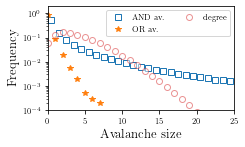

In [26]:
latexify.latexify(columns=2)
x=bs[0]-1
#bar((x[:-1]+x[1:])/2,mean(hs,axis=0)/N1,diff(bs[0]),label='aval.')
plot((x[:-1]+x[1:])/2,mean(hs,axis=0)/N1,'s',mfc = 'w',label='AND av.')
#errorbar((x[:-1]+x[1:])/2,mean(hs,axis=0)/N1,yerr=std(hs,axis=0)/N1/sqrt(len(hs)),ecolor='m',fmt='none',label='std')
semilogy()
xlabel("Avalanche size",fontsize=13)
ylabel("Frequency",fontsize=13)
ax=gca()
color = 'tab:red'
a,b = zip(*Counter(N1-np.count_nonzero(simulation,axis =1)-1).items())
plt.plot(a,b/sum(b),'*',label = 'OR av.')

'''
ax2=ax.twiny()
ax2.set_xlabel('degree',color=color,fontsize=13)
plot_corrected_Poissoninan_out(d,c,1,[1,25],color=color,label='degree')
ax2.tick_params(axis='x', labelcolor=color)
'''
plot_corrected_Poissoninan_out(d,c,1,[1,30],color=color,mfc = 'w',label='degree')
legend(ncol=2)
tight_layout()
xlim([0,25])
ylim(0.0001,)
#savefig('knockout-cascade_linear.pdf')


In [19]:
N1, N2, cout, dout = (10000,10000,c,d)
J = create_graph(cout, dout, N1, N2)
simulation = array(replics_parallel(J))

In [27]:
c,d

(1.0, 1.0)